In [1]:
import pandas as pd


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn import metrics

In [9]:
from sklearn.linear_model import LinearRegression

In [11]:
df = pd.read_csv(r'C:\Users\pc\Downloads\GOLD.csv')

In [13]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,26.625000,30.125000,26.625000,29.375000,20.754421,41074000
1,1996-02-01,29.875000,32.875000,29.875000,30.250000,21.372637,46490100
2,1996-03-01,30.250000,32.000000,28.250000,30.375000,21.460953,36573500
3,1996-04-01,30.250000,32.125000,29.375000,30.625000,21.637589,34821300
4,1996-05-01,30.625000,32.125000,29.750000,31.500000,22.255806,27064600
...,...,...,...,...,...,...,...
295,2020-08-01,28.799999,31.219999,25.870001,29.650000,29.567005,464682300
296,2020-09-01,30.270000,30.870001,26.830000,28.110001,28.110001,368320300
297,2020-10-01,28.389999,28.740000,25.559999,26.730000,26.730000,283368400
298,2020-11-01,27.000000,29.600000,24.010000,24.180000,24.180000,285747000


In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       300 non-null    object 
 1   Open       300 non-null    float64
 2   High       300 non-null    float64
 3   Low        300 non-null    float64
 4   Close      300 non-null    float64
 5   Adj Close  300 non-null    float64
 6   Volume     300 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 16.5+ KB


In [17]:
# Selecting only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[float, int])

# Calculating correlation matrix for numeric columns only
correlation_matrix = numeric_df.corr()

# Displaying the correlation matrix
correlation_matrix


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.986632,0.981052,0.966017,0.948429,-0.060238
High,0.986632,1.000000,0.979505,0.984366,0.965844,-0.030281
Low,0.981052,0.979505,1.000000,0.985261,0.965344,-0.108804
Close,0.966017,0.984366,0.985261,1.000000,0.980914,-0.063752
Adj Close,0.948429,0.965844,0.965344,0.980914,1.000000,0.083540
Volume,-0.060238,-0.030281,-0.108804,-0.063752,0.083540,1.000000


<Axes: >

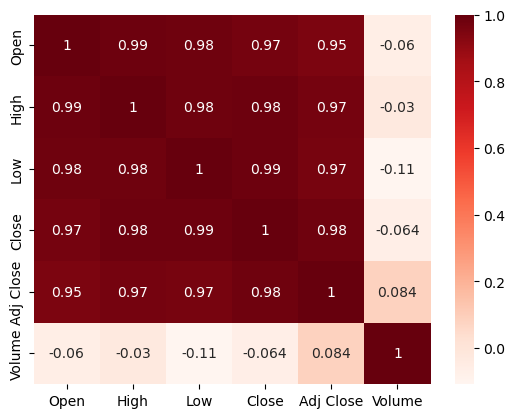

In [20]:
# Selecting only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[float, int])

# Calculating the correlation matrix for numeric columns only
correlation_matrix = numeric_df.corr()

# Ploting the heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='Reds')


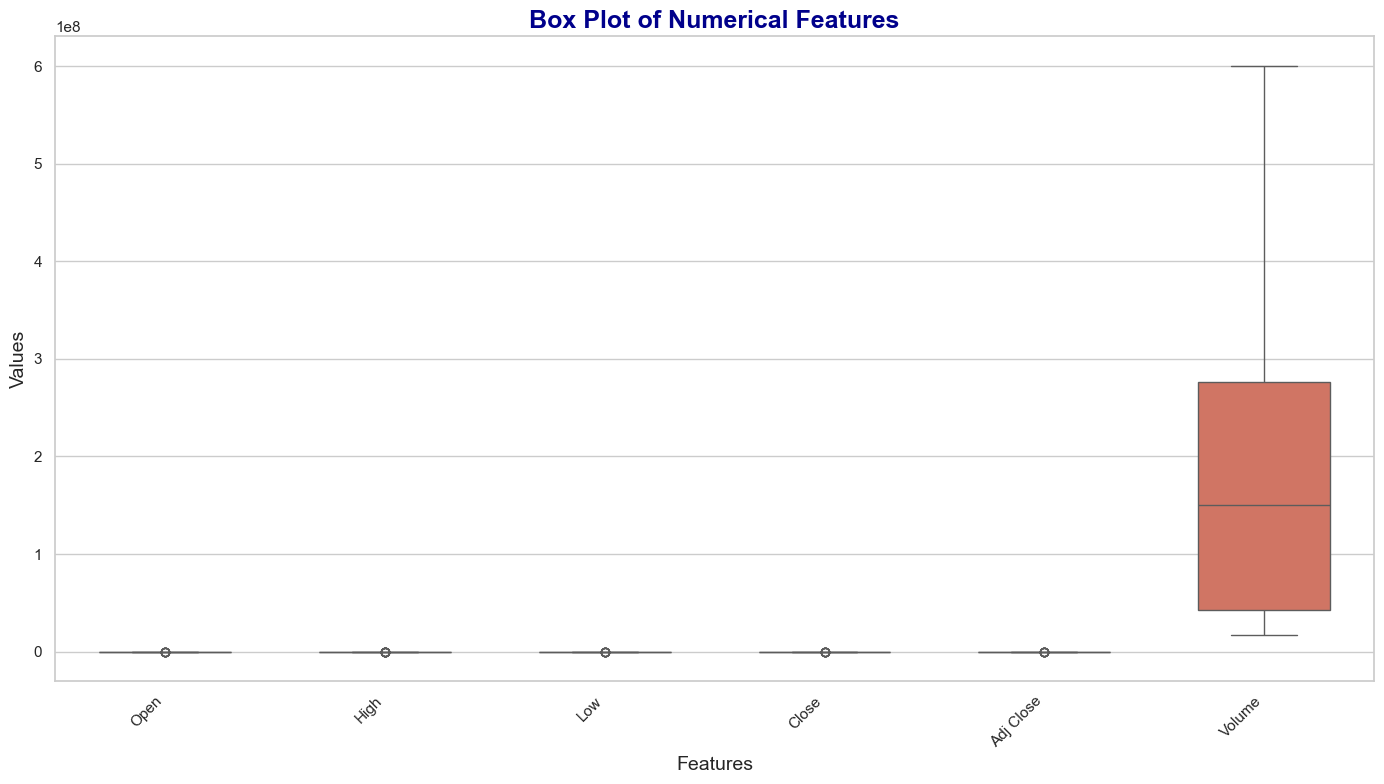

In [22]:

# Select only numerical columns
numeric_df = df.select_dtypes(include=[float, int])

# Set the style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Create the boxplot with a custom color palette
sns.boxplot(data=numeric_df, palette="coolwarm", width=0.6)

# Add titles and labels for better understanding
plt.title("Box Plot of Numerical Features", fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel("Features", fontsize=14)
plt.ylabel("Values", fontsize=14)

# Adjust the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot with a tight layout to avoid clipping
plt.tight_layout()
plt.show()



C:\Users\pc\AppData\Local\Temp\ipykernel_4568\1717456419.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=numeric_means.index, y=numeric_means.values, palette="Blues_d")


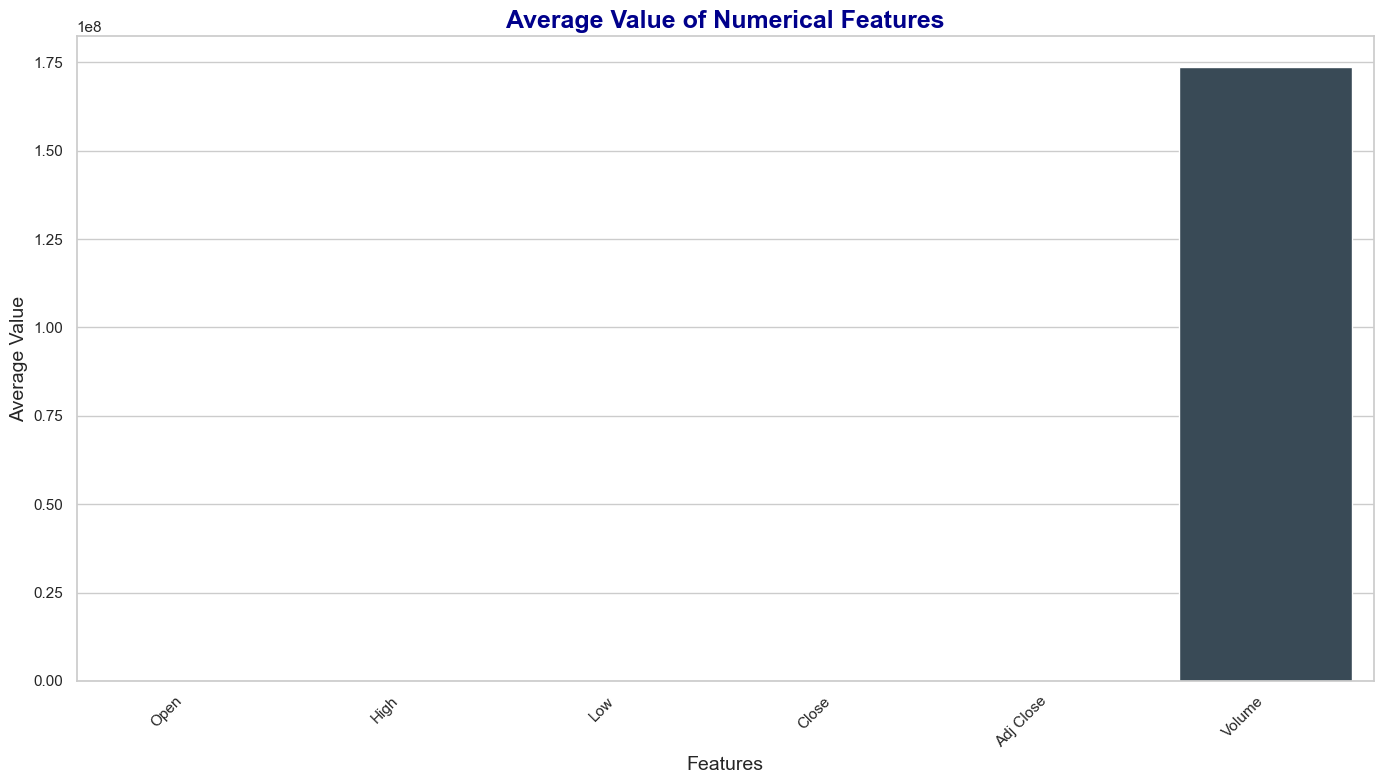

In [24]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=[float, int])

# Set the style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Create a bar plot with a custom color palette for each feature
numeric_means = numeric_df.mean()  # Calculate the mean for each numerical feature
sns.barplot(x=numeric_means.index, y=numeric_means.values, palette="Blues_d")

# Add titles and labels for better understanding
plt.title("Average Value of Numerical Features", fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel("Features", fontsize=14)
plt.ylabel("Average Value", fontsize=14)

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=45, ha='right')

# Show the plot with a tight layout to avoid clipping
plt.tight_layout()
plt.show()


In [26]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

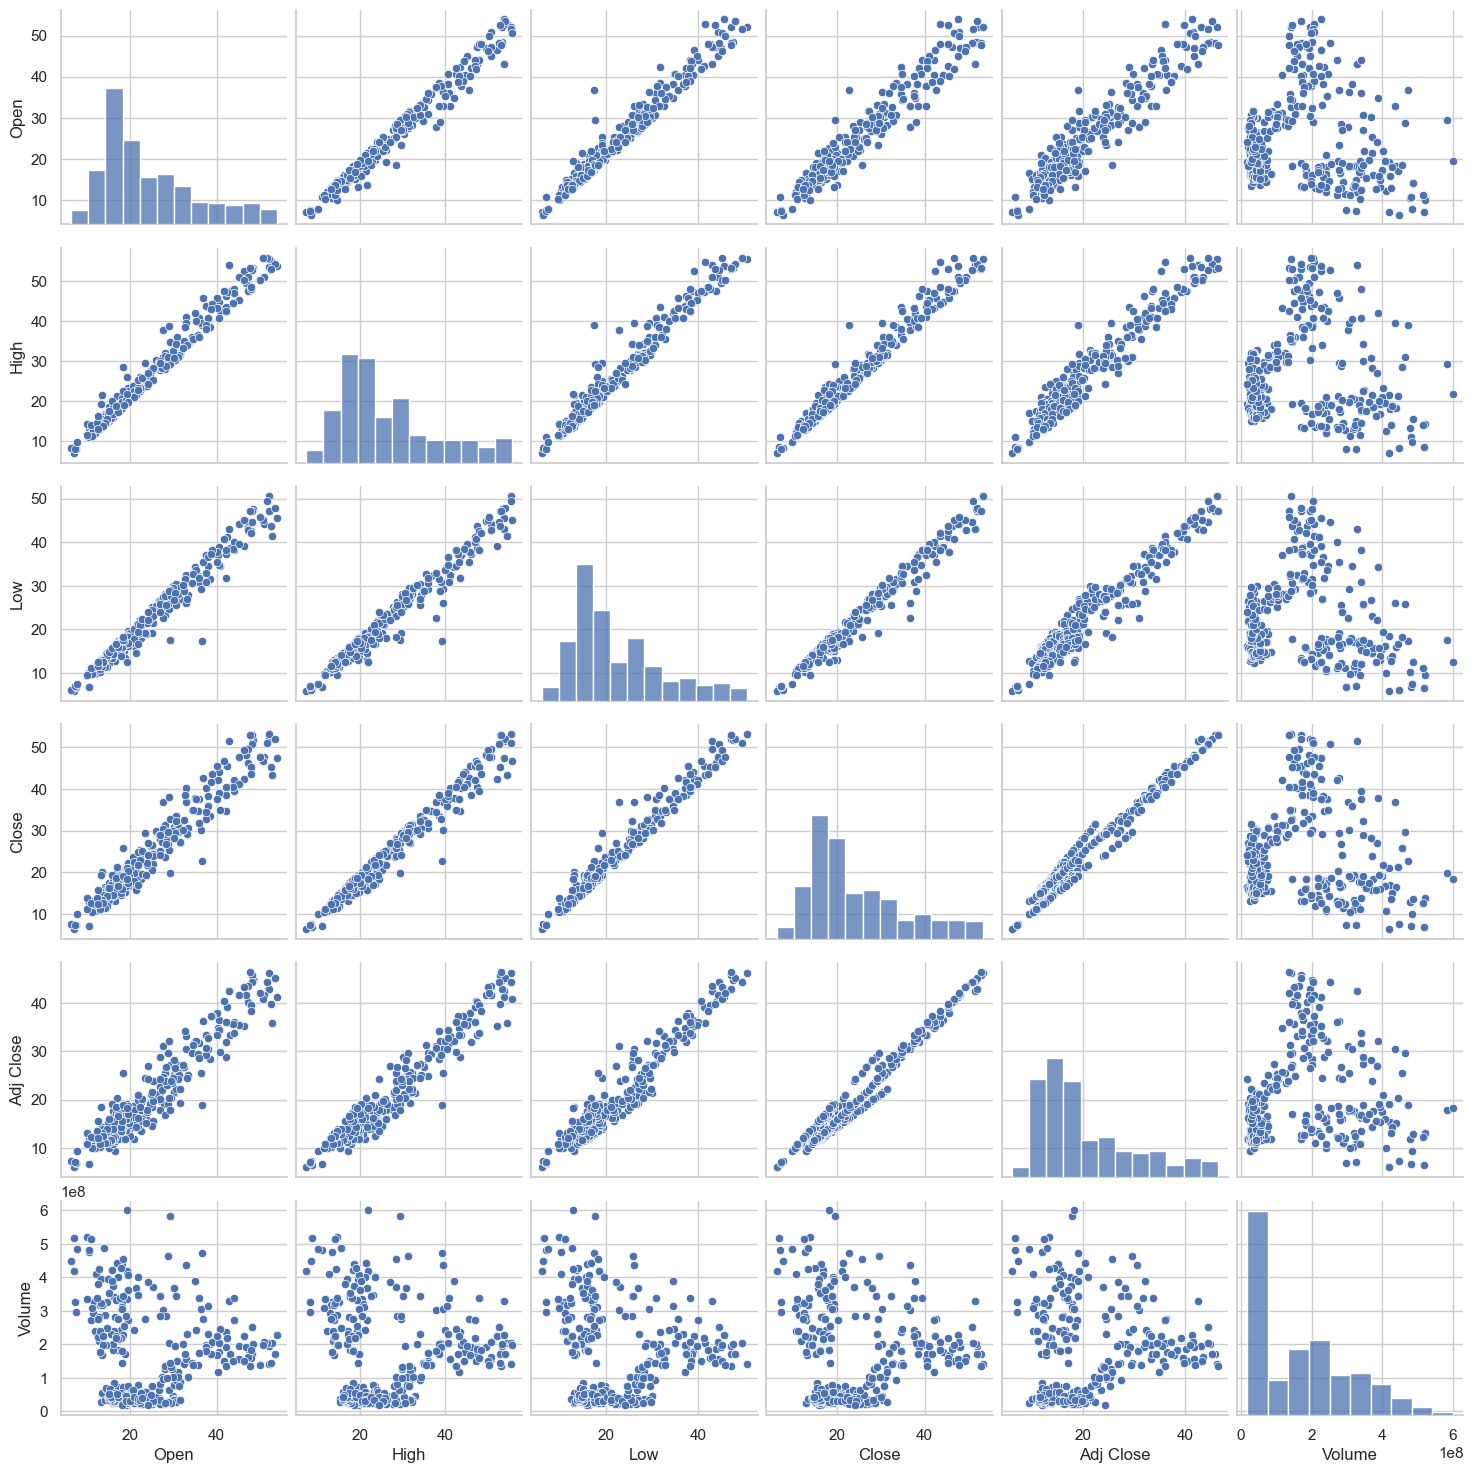

In [28]:
sns.pairplot(df)

In [32]:
# Calculate average order quantities
avg_order_quantity = df['Close'].mean()

# Find the maximum order quantity and the associated product type
max_order_quantity = df['Close'].max()
max_order_quantity_product = df[df['Close'] == max_order_quantity]['Date'].values[0]

# Find the minimum order quantity and the associated product type
min_order_quantity = df['Close'].min()
min_order_quantity_product = df[df['Close'] == min_order_quantity]['Date'].values[0]

# Print results
print(f"Average Order Quantity: {avg_order_quantity:.2f}")
print(f"Maximum Order Quantity: {max_order_quantity} (Date: {max_order_quantity_product})")
print(f"Minimum Order Quantity: {min_order_quantity} (Date: {min_order_quantity_product})")


Average Order Quantity: 24.35
Maximum Order Quantity: 53.18 (Date: 2010-12-01)
Minimum Order Quantity: 6.36 (Date: 2015-09-01)


In [34]:
# Calculate average price
mean_unit_qty = df['Close'].mean()  # Using 'Close' as a substitute for 'Cost of Goods Sold (COGS)'

# Calculate standard deviation
std_dev = df['High'].std()  # Using 'High' as a substitute for 'Transportation Cost Efficiency (%)'

# Find maximum and minimum prices with dates
max_price = df['High'].max()
max_price_rows = df[df['High'] == max_price]
max_price_date = max_price_rows['Date'].values[0] if not max_price_rows.empty else None

min_price = df['High'].min()
min_price_rows = df[df['High'] == min_price]
min_price_date = min_price_rows['Date'].values[0] if not min_price_rows.empty else None

# Calculate average daily volume
avg_volume = df['Volume'].mean()  # Using 'Volume' as a substitute for 'Supplier Count'

# Print results
print(f"Average Price: ${mean_unit_qty:.2f}")
print(f"Price Volatility (Standard Deviation): ${std_dev:.2f}")
print(f"Maximum Price: ${max_price:.2f} (Date: {max_price_date})")
print(f"Minimum Price: ${min_price:.2f} (Date: {min_price_date})")
print(f"Average Daily Volume: {avg_volume:.2f} units")


Average Price: $24.35
Price Volatility (Standard Deviation): $11.68
Maximum Price: $55.95 (Date: 2011-09-01)
Minimum Price: $7.18 (Date: 2015-09-01)
Average Daily Volume: 173659367.14 units


In [44]:
X = df.drop('Volume', axis=1)

In [38]:
X.shape

(300, 6)

In [40]:
# Assign the target variable
y = df['Close']  


In [42]:
y.shape


(300,)

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [48]:
X_train.shape

(210, 6)

In [50]:
X_test.shape

(90, 6)

In [52]:
model=LinearRegression()

E:\Users\pc\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Date']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
E:\Users\pc\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Date']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


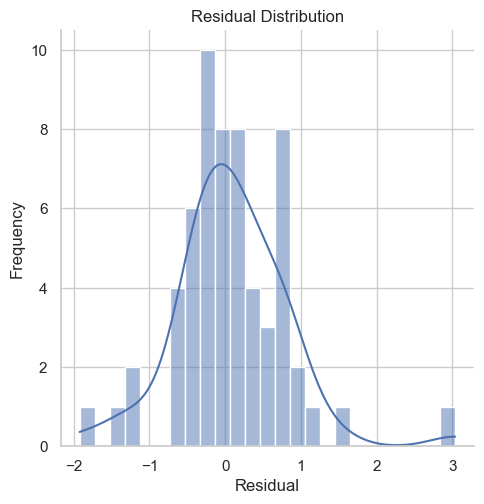

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (replace with your actual file)
df = pd.read_csv(r'C:\Users\pc\Downloads\GOLD.csv')

# Example: Use 'Close' as target variable (y) and others as features (X)
X = df.drop(['Close'], axis=1)  # Features (drop the target column)
y = df['Close']                # Target

# Ensure all columns in X are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with the column mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_predicted = model.predict(X_test_imputed)

# Calculate residuals
test_residual = y_test - y_predicted

# Plot residuals to check for patterns
sns.displot(test_residual, bins=25, kde=True)
plt.title('Residual Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()


E:\Users\pc\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Date']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
E:\Users\pc\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Date']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


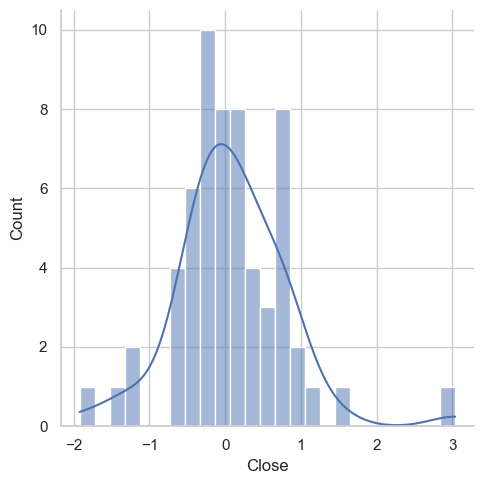

In [62]:
from sklearn.impute import SimpleImputer

# Create an imputer object that replaces NaN with the column mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both the training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the model using the imputed data
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Predicting values using the trained model on X_test
y_predicted = model.predict(X_test_imputed)

# Calculate residuals (difference between actual and predicted values)
test_residual = y_test - y_predicted

# Plot residuals to check for any patterns
import seaborn as sns
sns.displot(test_residual, bins=25, kde=True)




In [64]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Step 1: Handle missing values by filling NaNs with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)  # Fit the imputer on X_train and transform it
X_test = imputer.transform(X_test)  # Apply the same transformation to X_test

# Step 2: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Make predictions on X_test
y_pred = model.predict(X_test)

print("Predictions successfully made!")


Predictions successfully made!


E:\Users\pc\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Date']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
E:\Users\pc\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Date']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [66]:
y_pred

array([35.22098432, 12.51025299, 33.70178795, 25.52665529, 11.04790666,
       11.86240619, 37.92265222, 24.82190855, 26.31655072, 46.65275044,
        6.73411339, 13.35636251, 18.54854724, 19.49954808, 51.01314835,
       18.71516802, 20.9629001 , 18.80789513, 40.82718931, 35.73445866,
       15.00858496, 25.28334911, 16.79207174, 14.97022574, 20.80440765,
       17.89397632, 15.96698699, 29.76878261, 31.60882349,  7.08286227,
       21.42355982, 38.20215781, 20.89708239, 17.90305216, 16.80609454,
       27.65148207, 26.3537673 , 17.39074442, 17.95901995, 18.36377205,
       19.29988328, 22.08306278, 17.45145222, 15.86136211, 19.66257461,
       16.38115463,  6.39186725, 12.77059526, 22.52738024, 13.3630291 ,
       47.47371544, 50.67904621,  7.11042107, 19.39171452, 27.97392164,
       13.95765065, 20.64515949, 19.27540063, 49.60260073, 18.50168555])

In [68]:
# let's evalutate whether our y_predicted is how much near the actual y value
from sklearn.metrics import  mean_squared_error,r2_score

In [70]:
MSE = mean_squared_error(y_test,y_predicted)
print(f"The mean square error of model is {MSE}")
print(f"The root mean square error of model is {np.sqrt(MSE)}")


The mean square error of model is 0.5444922842705076
The root mean square error of model is 0.7378972044062151


In [72]:
from sklearn.metrics import r2_score

# Assuming y_test and y_predicted are already defined
performance = r2_score(y_test, y_predicted)
print(f"The r_2 score of the model is {performance:.4f}")

The r_2 score of the model is 0.9956


In [74]:
# let's evalutate whether our y_predicted is how much near the actual y value
from sklearn.metrics import  mean_squared_error,r2_score

In [78]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert X_test_imputed back to DataFrame
X_test_df = pd.DataFrame(X_test_imputed, columns=X.columns)  # Use original column names from X

# Verify the shape of the DataFrame and column names
print(f"X_test shape: {X_test_df.shape}")
print(f"X_test columns: {X_test_df.columns}")

# Set up the figure size
plt.figure(figsize=(8, 5))

# List of features (columns) from X_test_df
features = X_test_df.columns

# Plotting Actual vs Predicted Revenue for each feature
for feature in features:
    plt.scatter(X_test_df[feature], y_test, color='blue', alpha=0.7, label='Actual Revenue')
    plt.scatter(X_test_df[feature], y_predicted, color='red', alpha=0.7, label='Predicted Revenue')
    plt.plot(X_test_df[feature], y_predicted, color='grey', label='Regression Line')
    plt.title(f'Actual vs Predicted Revenue for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()


ValueError: Shape of passed values is (60, 5), indices imply (60, 6)